In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle
import cv2
import numpy as np
import csv

In [120]:
# def extract_leaf_features(image_path):
#     # Load the image
#     image = cv2.imread(image_path)

#     # image = cv2.imread(image_path)

#     # # Get the dimensions of the image
#     # height, width, _ = image.shape

#     # # Define the coordinates of the middle region
#     # margin = 500  # Adjust this value as per your requirements
#     # top = margin//100
#     # bottom = height - margin
#     # left = margin
#     # right = width - (margin)

#     # # Crop the middle region of the image
#     # cropped_image = image[top:bottom, left:right]

#     # Convert the cropped image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Perform adaptive thresholding to obtain a binary image
#     thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

#     # Find contours of the leaves
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Initialize variables to store leaf count and leaf area
#     leaf_count = 0
#     leaf_area = 0

#     # Calculate leaf count and area for each contour
#     for contour in contours:
#         # Approximate the contour to reduce the number of points
#         epsilon = 0.06 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         # Exclude contours with very small areas
#         if cv2.contourArea(approx) > 350:
#             leaf_count += 1
#             leaf_area += cv2.contourArea(approx)

#     #Export the features to a CSV file
#     csv_file = "leaf_features.csv"
#     with open(csv_file, 'w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(["Leaf_Count", "leaf_area"])
#         writer.writerow([leaf_count, leaf_area])

#     print("Leaf features exported to:", csv_file)

#     # Return the leaf count and leaf area
#     return leaf_count, leaf_area, thresholded

In [2]:
def enhance_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance contrast
    enhanced_image = cv2.equalizeHist(gray)

    return enhanced_image

In [3]:
def sharpen_image(enhanced_image):
    # Apply Laplacian sharpening
    sharpened = cv2.Laplacian(enhanced_image, cv2.CV_8U, ksize=3)

    # Add the sharpened image to the original to enhance details
    sharpened_image = cv2.addWeighted(enhanced_image, 1.5, sharpened, -0.5, 0)

    return sharpened_image

In [18]:
def extract_leaf_features(sharpened_image):
    # Load the image
    image = cv2.imread(sharpened_image)

    # image = cv2.imread(image_path)

    # # Get the dimensions of the image
    # height, width, _ = image.shape

    # # Define the coordinates of the middle region
    # margin = 500  # Adjust this value as per your requirements
    # top = margin//100
    # bottom = height - margin
    # left = margin
    # right = width - (margin)

    # # Crop the middle region of the image
    # cropped_image = image[top:bottom, left:right]

    # Convert the cropped image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform adaptive thresholding to obtain a binary image
    thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Find contours of the leaves
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize variables to store leaf count and leaf area
    leaf_count = 0
    leaf_area = 0
    #pixel_to_cm_conversion_factor = 0.000343

    # Calculate leaf count and area for each contour
    for contour in contours:
        # Approximate the contour to reduce the number of points
        epsilon = 0.06 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Exclude contours with very small areas
        if cv2.contourArea(approx) > 400:
            leaf_count += 1
            leaf_area += cv2.contourArea(approx)

    # # Convert leaf area from pixels squared to cm squared
    # leaf_area_cm2 = leaf_area * (pixel_to_cm_conversion_factor)

    #Export the features to a CSV file
    csv_file = "leaf_features_single.csv"
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Leaf_Count", "leaf_area"])
        writer.writerow([leaf_count, leaf_area])

    print("Leaf features exported to:", csv_file)

    # Return the leaf count and leaf area
    return leaf_count, leaf_area, thresholded

In [38]:
# Folder path containing images
image_folder = "../images/cropped new/"

In [39]:
# # Create a CSV file with header
# csv_file = "leaf_features.csv"
# with open(csv_file, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Image_Name", "Leaf_Count", "leaf_area"])

In [40]:
# List to store results
results = []
# # Create a CSV file with header
# csv_file = "leaf_features.csv"
# with open(csv_file, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Image_Name", "Leaf_Count", "leaf_area"])

# Iterate through all images in the folder
for filename in os.listdir(image_folder):
    #if filename.endswith(".jpg") or filename.endswith(".jpeg"):
    image_path = os.path.join(image_folder, filename)
    print(image_path)
    # Extract leaf features from the sharpened image
    leaf_count, leaf_area, thresholded = extract_leaf_features(image_path)
    results.append((filename, leaf_count, leaf_area))

    # Export the features to a CSV file
csv_file = "leaf_features_new.csv"
with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Leaf Count", "Leaf Area Covered"])
        for result in results:
            writer.writerow(result)

        #print(f"Leaf features for {filename} exported to:", csv_file)

../images/cropped new/26_1.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/26_3.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/26_5.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/28_1.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/28_5.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/29_3.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/29_4.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/29_5.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/30_1.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/30_4.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/31_2.jpg
Leaf features exported to: leaf_features_single.csv
../images/cropped new/31_3.jpg
Leaf features exported to: leaf_features_single.csv
../i

In [35]:
image_path = "../images/cropped/142_4.jpg"

In [37]:
#enhance_image = enhance_image(image_path)

In [26]:
sharpen_image = sharpen_image(enhanced_image)

In [27]:
leaf_count, leaf_area, thresholded = extract_leaf_features(image_path)

Leaf features exported to: leaf_features_single.csv


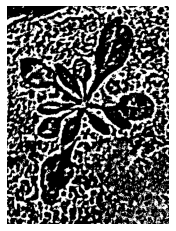

In [28]:
# Display the thresholded image
plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
print("Leaf Count:", leaf_count)
print("Leaf Area:", leaf_area)

Leaf Count: 10
Leaf Area: 11095.5
